In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.datasets import make_classification
#from imblearn.over_sampling import RandomOverSampler
#from collections import Counter

In [5]:
df = pd.read_csv('dataset/CVD_cleaned.csv')

In [ ]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.info()
# 19 features identificadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [9]:
print(df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

- Peso indo de 24.95 kg á 293 kg
- A altura mínima (91 cm) e máxima (241 cm) são valores extremos
- De 12.02 a 99.33 de IMB. O IMC máximo é extremamente alto, indicando obesidade severa, e o mínimo pode sugerir desnutrição de usuários
- Distribuição do álcool:
    - 25% da população não consome álcool.
    - Metade consome até 1 unidade.
    - 75% consome até 6 unidades, mas o máximo chega a 30 unidades.
    
    Insight: A média é puxada para cima, sugerindo que há um pequeno grupo de indivíduos que consome muito álcool.

- Média de 29.8 para consumo de frutas, o que indica um valor de 1 fruta por mês, e há outliers no processo (120)
- 15.1 porções/mês de consumo de vegetais verdes
- 6.3 porções/mês de consumo de batata frita


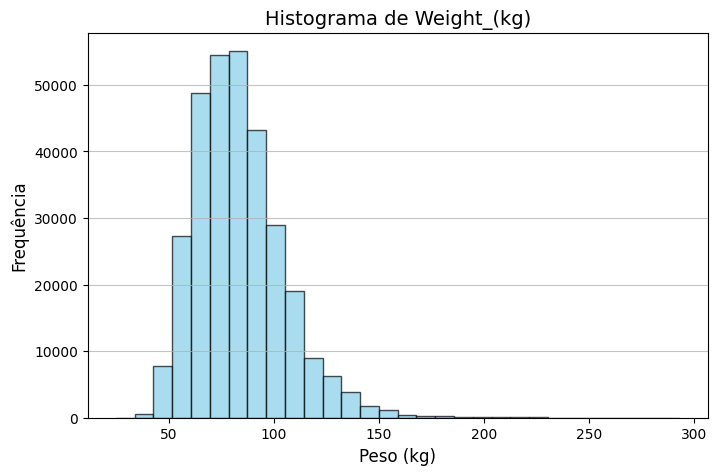

In [11]:
peso_coluna = 'Weight_(kg)'
if peso_coluna in df.columns:
    # Gerar histograma para o Peso
    plt.figure(figsize=(8, 5))
    plt.hist(df[peso_coluna], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {peso_coluna}', fontsize=14)
    plt.xlabel('Peso (kg)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print(f"A coluna '{peso_coluna}' não foi encontrada no dataset.")

In [ ]:
from scipy.stats import kurtosis

curtose = kurtosis(df['Weight_(kg)'], fisher=False)
print(f"Curtose da distribuição de peso: {curtose}")


Curtose da distribuição de peso: 5.5736643123101075


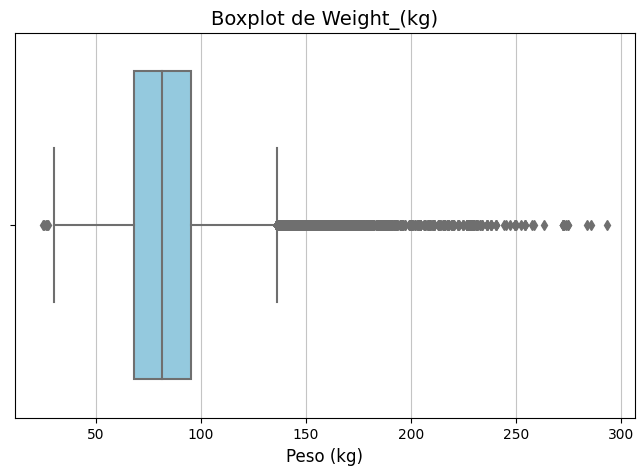

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weight_(kg)'], color='skyblue')
plt.title('Boxplot de Weight_(kg)', fontsize=14)
plt.xlabel('Peso (kg)', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.show()

- Distribuição assimétrica positiva (leve cauda à direita)
- Curtose de 5.5, que indica uma curtose positiva
    - A cauda direita indicam pessoas com pesos bem acima da média
    - Grande impacto dos valores extremos

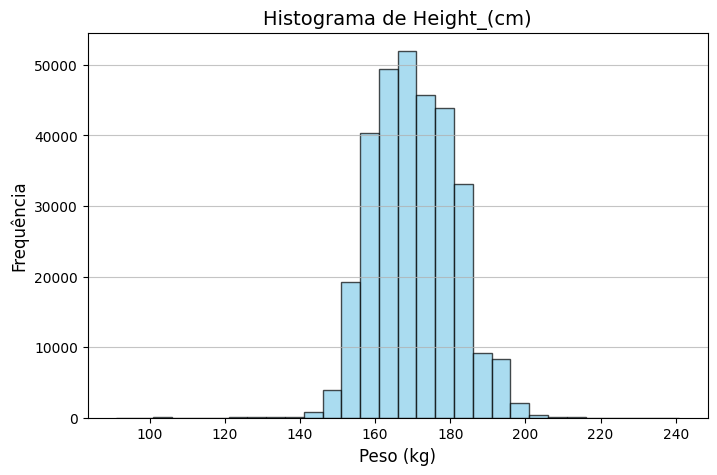

In [15]:
altura_coluna = 'Height_(cm)'
if altura_coluna in df.columns:
    # Gerar histograma para o Peso
    plt.figure(figsize=(8, 5))
    plt.hist(df[altura_coluna], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {altura_coluna}', fontsize=14)
    plt.xlabel('Peso (kg)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print(f"A coluna '{peso_coluna}' não foi encontrada no dataset.")

In [ ]:
curtose = kurtosis(df['Height_(cm)'], fisher=False)
print(f"Curtose da distribuição de peso: {curtose}")

Curtose da distribuição de peso: 3.005746229556401


- Distribuição mesocúrtica, já que a curtose é muito próxima de 3.0, que é uma forma semelhante à de uma distribuição normal.

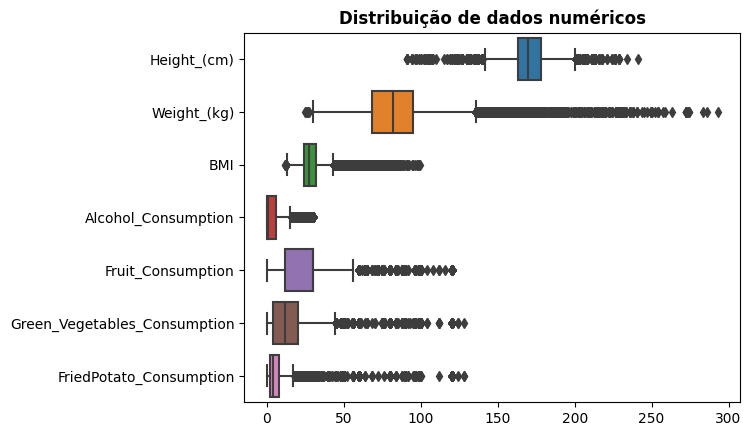

In [18]:
numeric_data = df.select_dtypes(include = [np.number])
categorical_data = df.select_dtypes(exclude = [np.number]) # Selects categorical datatypes only

extreme_check_boxplot = sns.boxplot(data = df,
                                   orient = 'h')
plt.title('Distribuição de dados numéricos',
         fontweight = 'bold')
plt.show()

plt.show()

In [22]:
categorical_column_names = list(df.columns)

print(f'Lista de variáveis categóricas: {list(categorical_data)}')
print(f'Número de variáveis categóricas: {len(list(categorical_data))}')
print()
print('-----------------------------------------------------------------------')

for col in categorical_data:
    print(f'{col} Valores distintos: {list(categorical_data[col].unique())}')
    print(f'{col} tem {len(list(categorical_data[col].unique()))} valores únicos')
    print()

Lista de variáveis categóricas: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
Número de variáveis categóricas: 12

-----------------------------------------------------------------------
General_Health Valores distintos: ['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']
General_Health tem 5 valores únicos

Checkup Valores distintos: ['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']
Checkup tem 5 valores únicos

Exercise Valores distintos: ['No', 'Yes']
Exercise tem 2 valores únicos

Heart_Disease Valores distintos: ['No', 'Yes']
Heart_Disease tem 2 valores únicos

Skin_Cancer Valores distintos: ['No', 'Yes']
Skin_Cancer tem 2 valores únicos

Other_Cancer Valores distintos: ['No', 'Yes']
Other_Cancer tem 2 valores únicos

Depression Valores distintos: ['No', 'Yes']
Depression tem 2 valores únicos

Diabe

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Checkup histogram')

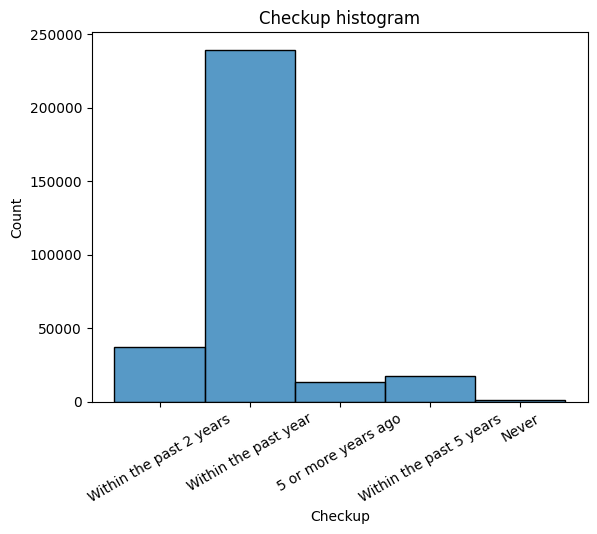

In [27]:
sns.histplot(data = df_CVD['Checkup'], stat = 'count')
plt.xticks(rotation = 30)
plt.title('Checkup histogram')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Diabetes histogram')

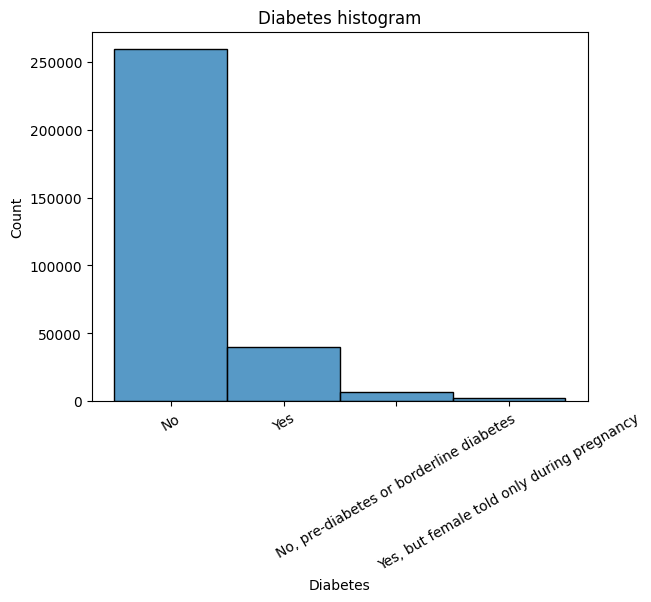

In [29]:
sns.histplot(data = df['Diabetes'], stat = 'count')
plt.xticks(rotation = 30)
plt.title('Diabetes histogram')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '70-74'),
  Text(1, 0, '60-64'),
  Text(2, 0, '75-79'),
  Text(3, 0, '80+'),
  Text(4, 0, '65-69'),
  Text(5, 0, '50-54'),
  Text(6, 0, '45-49'),
  Text(7, 0, '18-24'),
  Text(8, 0, '30-34'),
  Text(9, 0, '55-59'),
  Text(10, 0, '35-39'),
  Text(11, 0, '40-44'),
  Text(12, 0, '25-29')])

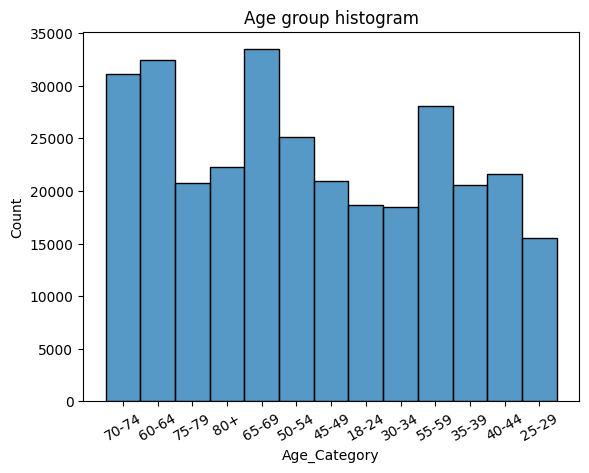

In [30]:
sns.histplot(data = df_CVD['Age_Category'], stat = 'count')
plt.title('Age group histogram')
plt.xticks(rotation = 30)

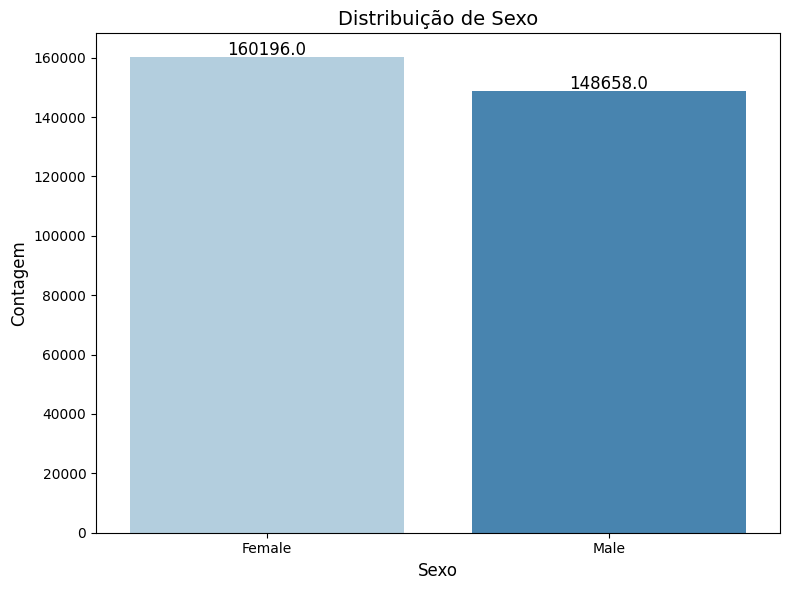

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Sex', data=df, ax=ax, palette='Blues')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

ax.set_title('Distribuição de Sexo', fontsize=14)
ax.set_xlabel('Sexo', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12)

plt.tight_layout()
plt.show()

#### Resultado geral
- Maioria dos casos diagnósticados são em mulheres
- Usuários diagnósticados tinham a pré-disposição de consumo maior de álcool, mais peso (massa corporal), consumiam do tabagismo e idades mais velhas, basicamente.